In [21]:
import pandas as pd
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt

In [22]:
train=pd.read_csv("https://raw.githubusercontent.com/vaasu2002/Analytics-Vidhya/main/Loan%20Prediction/train_ctrUa4K.csv")

In [23]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

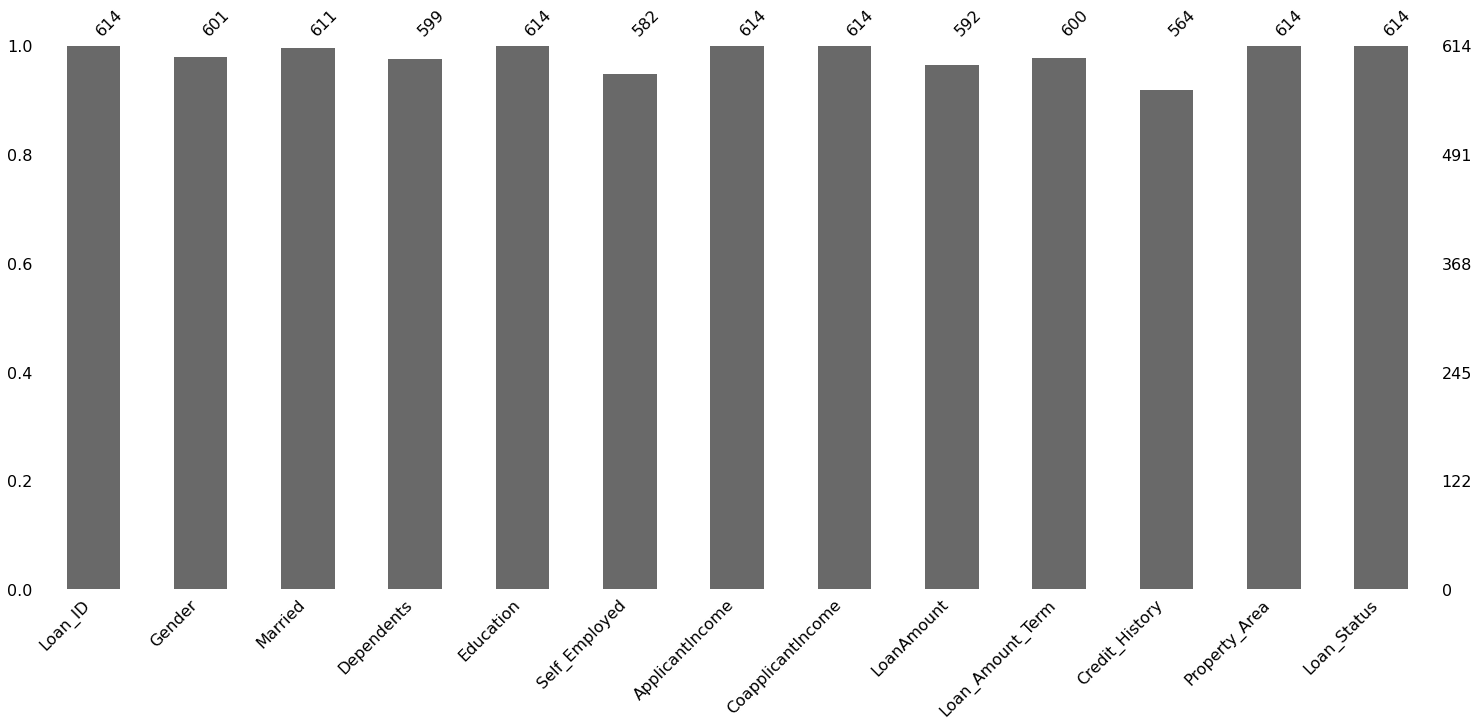

In [31]:
import missingno as msno
p=msno.bar(train)

In [32]:
categorial_list = []
var_list = []
for x in train.columns:
  if(train[x].dtype=='object'):
    categorial_list.append(x)
  elif(train[x].dtype=='int64'):
    var_list.append(x)
  elif(train[x].dtype=='float64'):
    var_list.append(x)
print(f"categorial list = {categorial_list}")
print(f"variable list = {var_list}")

categorial list = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
variable list = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [25]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [26]:
# train['Married'].fillna(train.Married.mode(), inplace=True)
train["Married"].fillna("Yes", inplace = True)

In [28]:
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [29]:
train.drop('Loan_ID',1,inplace = True)

In [30]:
train = pd.get_dummies(train, columns = ['Married'])
train.head()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_No,Married_Yes
0,Male,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0
1,Male,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,Male,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0


In [33]:
train.isnull().sum()

Gender               13
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Married_No            0
Married_Yes           0
dtype: int64

In [34]:
train = pd.get_dummies(train, columns = ['Property_Area'])

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.Education = le.fit_transform(train.Education)
train.Loan_Status = le.fit_transform(train.Loan_Status)

In [35]:
train.head()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,0,0,No,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,1
1,Male,1,0,No,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,0
2,Male,0,0,Yes,3000,0.0,66.0,360.0,1.0,1,0,1,0,0,1
3,Male,0,1,No,2583,2358.0,120.0,360.0,1.0,1,0,1,0,0,1
4,Male,0,0,No,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,1


In [24]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 25.9 MB 1.8 MB/s
     |████████████████████████████████| 10.1 MB 6.8 MB/s 
     |████████████████████████████████| 596 kB 63.5 MB/s 
     |████████████████████████████████| 102 kB 11.1 MB/s 
     |████████████████████████████████| 675 kB 51.8 MB/s 
     |████████████████████████████████| 4.7 MB 42.6 MB/s 
     |████████████████████████████████| 62 kB 794 kB/s 
     |████████████████████████████████| 812 kB 46.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=3ac22312ec6f2ec259a174a1d55b90b42902597e10526283f991732712f8f2df
  Stored in directory: /tmp/pip-ephem-wheel-cache-19ctd3jn/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=78f63c0cccdbd07b7100d14d1a1a877fd6897b9e07457ca103520207b090921d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [37]:
train.isnull().sum()

Gender                     13
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Married_No                  0
Married_Yes                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [36]:
import pandas_profiling as pp
pp.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
!pip install impyute

In [41]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train[['LoanAmount']].values, k=30)


df_t1 = pd.DataFrame(imputed_training,columns=['LoanAmount'])

train[['LoanAmount']] = df_t1[['LoanAmount']]

In [42]:
train['LoanAmount'].isnull().sum()

0

In [43]:
train.isnull().sum()

Gender                     13
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Married_No                  0
Married_Yes                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [44]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train[['Loan_Amount_Term','Credit_History']].values, k=30)


df_t1 = pd.DataFrame(imputed_training,columns=['Loan_Amount_Term','Credit_History'])

train[['Loan_Amount_Term','Credit_History']] = df_t1[['Loan_Amount_Term','Credit_History']]

/usr/local/lib/python3.7/dist-packages/impyute/imputation/cs/fast_knn.py:113: RuntimeWarning: invalid value encountered in true_divide
  weights = distances/np.sum(distances)


In [45]:
train.isnull().sum()

Gender                     13
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             36
Loan_Status                 0
Married_No                  0
Married_Yes                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [46]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train[['Credit_History']].values, k=30)


df_t1 = pd.DataFrame(imputed_training,columns=['Credit_History'])

train[['Credit_History']] = df_t1[['Credit_History']]

Gender                     13
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Loan_Status                 0
Married_No                  0
Married_Yes                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [48]:
train["Self_Employed"].fillna('No', inplace = True)
d={'No':0, 'Yes':1}
train['Self_Employed']=train['Self_Employed'].apply(lambda x:d[x])

In [50]:
train.drop('Dependents',axis = 1,inplace = True)

In [52]:
train["Gender"].fillna("Male", inplace = True)
train = pd.get_dummies(train, columns = ['Gender'])
train.head()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male
0,0,0,5849,0.0,144.875644,360.0,1.0,1,1,0,0,0,1,0,1
1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,1,1,0,0,0,1
2,0,1,3000,0.0,66.000000,360.0,1.0,1,0,1,0,0,1,0,1
3,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,0,1,0,1
4,0,0,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,1,0,1


In [53]:
train.isnull().sum()

Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Married_No                 0
Married_Yes                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Gender_Female              0
Gender_Male                0
dtype: int64

In [59]:
X = train.drop(['Loan_Status'],1)
Y = train['Loan_Status']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=0.25)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print()
print(model.score(X_test, y_test))

[[ 19  32]
 [  3 100]]

0.7727272727272727
